In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import cluster

In [4]:
academy = pd.read_csv('academy.csv', encoding = 'cp949')
academy.columns = ['num','kor','math','eng','science','intention']
academy = academy.drop('num', axis = 1)
academy

,kor,math,eng,science,intention
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90
5,90,92,90,96,100
6,65,70,66,76,70
7,60,90,70,98,80
8,46,56,43,55,60
9,88,67,90,70,70


In [6]:
print(type(academy))
academy.shape

<class 'pandas.core.frame.DataFrame'>


(52, 5)

In [7]:
np.array(academy)

array([[ 90,  75,  85,  60,  70],
       [ 65,  90,  60,  88,  80],
       [ 45,  53,  48,  50,  60],
       [ 77,  96,  62,  92,  70],
       [ 88,  89,  80,  82,  90],
       [ 90,  92,  90,  96, 100],
       [ 65,  70,  66,  76,  70],
       [ 60,  90,  70,  98,  80],
       [ 46,  56,  43,  55,  60],
       [ 88,  67,  90,  70,  70],
       [ 70,  93,  77,  89,  60],
       [ 99,  80,  95,  70,  80],
       [ 97,  67,  80,  60,  80],
       [ 50,  40,  30,  54,  50],
       [ 90,  77,  92,  60,  70],
       [ 55,  88,  67,  92,  60],
       [ 77,  90,  70,  98,  70],
       [ 90,  89,  80,  92,  90],
       [ 76,  90,  80,  92,  70],
       [ 70,  92,  80,  95,  70],
       [ 76,  75,  70,  82,  80],
       [ 77,  92,  68,  89,  80],
       [ 60,  50,  70,  40,  60],
       [ 54,  70,  56,  72,  60],
       [ 72,  88,  67,  95,  80],
       [ 58,  76,  59,  80,  70],
       [ 88,  60,  76,  58,  60],
       [ 84,  88,  90,  92,  90],
       [ 45,  76,  56,  78,  70],
       [ 76,  

In [8]:
# 자료형 변환 데이터프레임 >> 넘파이 배열
academy_arr = np.array(academy)

In [11]:
academy.columns, academy_arr.shape, type(academy_arr)

(Index(['kor', 'math', 'eng', 'science', 'intention'], dtype='object'),
 (52, 5),
 numpy.ndarray)

In [12]:
# 모델 학습
model = cluster.KMeans(n_clusters = 5) # 5개 군집으로 분류
model.fit(academy_arr)

KMeans(n_clusters=5)

In [13]:
model.labels_

array([2, 3, 4, 3, 1, 1, 0, 3, 4, 2, 3, 1, 2, 4, 2, 0, 3, 1, 3, 3, 3, 3,
       4, 0, 3, 0, 2, 1, 0, 2, 3, 1, 2, 2, 4, 0, 3, 1, 1, 0, 2, 1, 2, 0,
       4, 3, 2, 0, 1, 2, 4, 3])

In [14]:
labels = model.labels_

In [16]:
ldata = academy_arr[labels == 0]
print(ldata,'\n')
print(ldata[:, 2])
print(ldata[:, 3])

[[65 70 66 76 70]
 [55 88 67 92 60]
 [54 70 56 72 60]
 [58 76 59 80 70]
 [45 76 56 78 70]
 [56 78 67 89 60]
 [56 63 70 71 70]
 [58 77 62 88 70]
 [57 76 58 71 60]] 

[66 67 56 59 56 67 70 62 58]
[76 92 72 80 78 89 71 88 71]


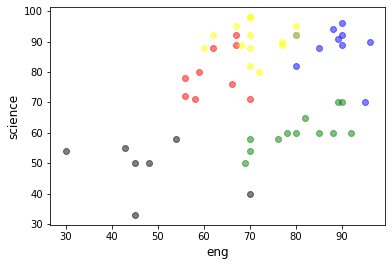

In [21]:
# 시각화 - 그래프 그리기
ldata = academy_arr[labels == 0]
plt.scatter(ldata[:,2] , ldata[:,3], c='red', alpha=0.5, marker = 'o')
ldata = academy_arr[labels == 1]
plt.scatter(ldata[:,2] , ldata[:,3], c='blue', alpha=0.5, marker = 'o')
ldata = academy_arr[labels == 2]
plt.scatter(ldata[:,2] , ldata[:,3], c='green', alpha=0.5, marker = 'o')
ldata = academy_arr[labels == 3]
plt.scatter(ldata[:,2] , ldata[:,3], c='yellow', alpha=0.5, marker = 'o')
ldata = academy_arr[labels == 4]
plt.scatter(ldata[:,2] , ldata[:,3], c='black', alpha=0.5, marker = 'o')

# 축라벨 설정
plt.xlabel(academy.columns[2], fontsize = 'large')
plt.ylabel(academy.columns[3], fontsize = 'large')
plt.show()

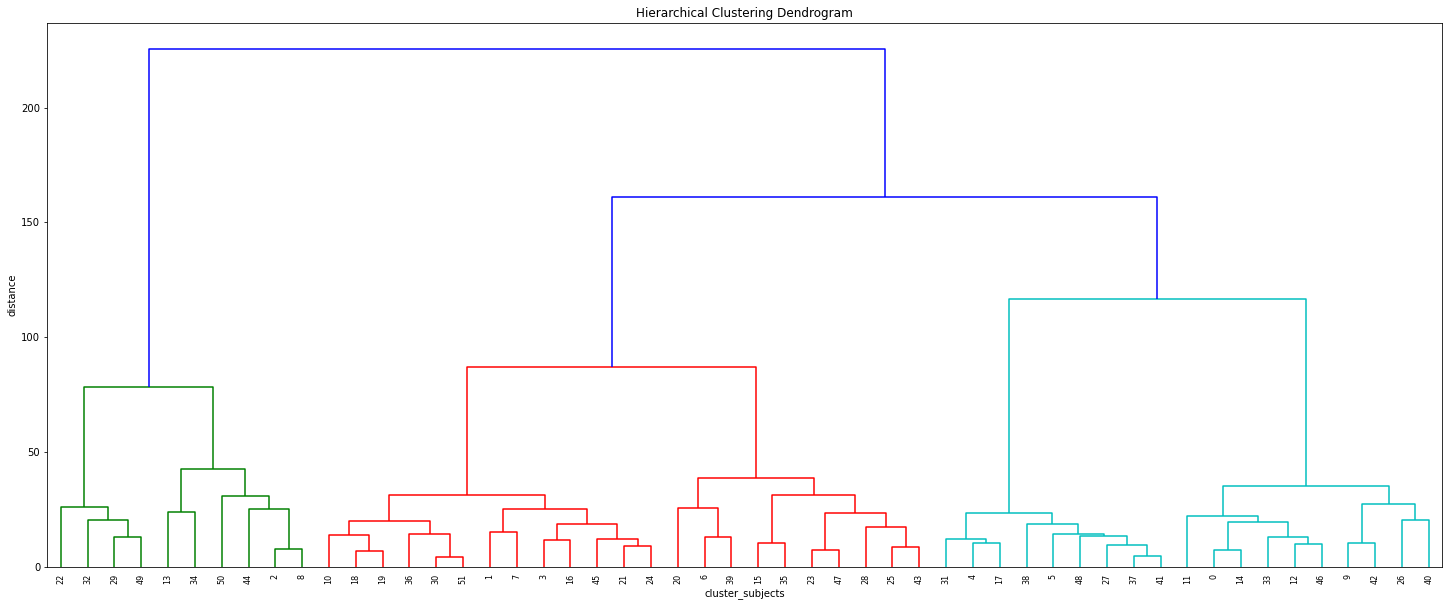

In [22]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(academy_arr, 'ward')

plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cluster_subjects')
plt.ylabel('distance')

dendrogram(z,
          leaf_rotation = 90, # rotation the x axis labels(각도 조절)
          leaf_font_size = 8)

plt.show()